# Load data

In [53]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
file_id='1908uib8ySgXJemNjkOOPGYfPVyj9mdwA'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
link=link.format(FILE_ID=file_id)
data=pd.read_csv(link)
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [54]:
print('row_number:',data.shape[0]) #using data.shape[0] getting row number
print('column_number:',data.shape[1])

row_number: 5000
column_number: 21


# Data Cleaning

In [55]:
data['voice_mail_plan'][0]

' yes'

delete blank space using x.strip()

In [56]:
data[['intl_plan','voice_mail_plan','churned']]=data[['intl_plan','voice_mail_plan','churned']].applymap(lambda x:x.strip())

In [57]:
data['voice_mail_plan'][0]

'yes'

delete '.' in y

In [58]:
data['churned']=data['churned'].apply(lambda x: x.strip('.'))

In [59]:
data['churned'][0]

'False'

# Feature Understanding

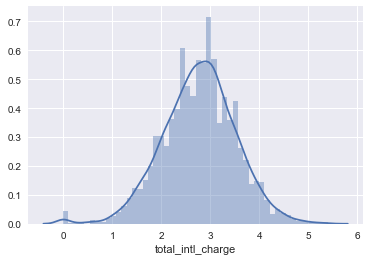

In [60]:
%matplotlib inline 
#show graph in jupyter cell
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data['total_intl_charge'])

In [61]:
type(data)

pandas.core.frame.DataFrame

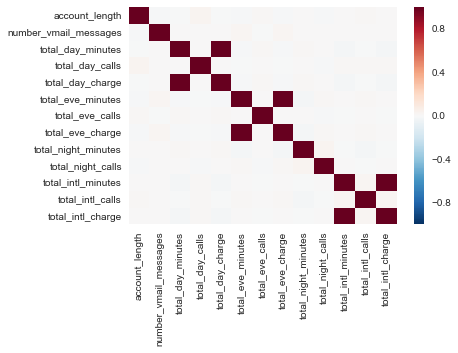

In [62]:
corr_=data[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()
sns.heatmap(corr_)

# Feature Preprocessing

1.Feature Correlation Pearson Relation

In [63]:
from scipy.stats import pearsonr
print((pearsonr(data['total_day_minutes'],data['number_vmail_messages']))[0])

0.005381375960654535


2.Ground Truth Data

In [64]:
import numpy as np

In [65]:
y=np.where(data['churned']=='True',1,0)

In [66]:
y.sum()

707

3.Drop column

In [67]:
x=data.drop(['area_code','phone_number','churned'],axis=1)
x.head()

,state,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


4.convert yes or no to boolean value 

In [68]:
x['intl_plan']=x['intl_plan']=='yes'
x['voice_mail_plan']=x['voice_mail_plan']=='yes'

5.check the proportion of y==1

In [69]:
y.sum()/y.size

0.1414

6.get dummies

In [70]:
x=pd.get_dummies(x,columns=['state'])

In [71]:
x.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


# Spiliting data

Spiliting data with model_selection.train_test_split in sklearn

In [72]:
from sklearn import model_selection
x_train,x_test,y_train,y_test= model_selection.train_test_split(x, y, test_size=0.2)
x_train.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
4236,91,False,False,0,153.2,70,26.04,231.7,91,19.69,...,0,0,0,0,0,0,0,0,0,0
2750,186,False,False,0,137.8,97,23.43,187.7,118,15.95,...,0,0,0,0,0,0,0,0,0,0
2395,128,False,False,0,199.3,86,33.88,194.8,102,16.56,...,0,0,0,0,0,0,0,0,0,0
1681,110,False,False,0,131.9,93,22.42,272.7,106,23.18,...,0,0,0,0,0,0,0,0,0,0
1670,56,False,True,24,121.7,87,20.69,184.0,76,15.64,...,0,0,0,0,0,0,0,0,0,0


scale data

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model training

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

classifier_logistic=LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

Logistic regression

In [75]:
#Train the model
classifier_logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
#accuracy of test data
classifier_logistic.score(x_test,y_test)

0.862

In [77]:
classifier_logistic.score(x_train,y_train)

0.8705

Cross Validation 

In [78]:
model_name=['Logistic Regression','KNN','Random Forest']
model_list=[classifier_logistic,classifier_KNN,classifier_RF]
count=0
for classifier in model_list:
    cv_score=model_selection.cross_val_score(classifier,x_train,y_train,cv=5)
    #print(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_name[count],cv_score.mean()))
    count+=1

Model accuracy of Logistic Regression is: 0.866
Model accuracy of KNN is: 0.860
Model accuracy of Random Forest is: 0.927


# Find Hyperparameters- Logistic Regression

In [79]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print('Best score: %0.3f'%gs.best_score_)
    print('Best parameters set:')
    best_parameters=gs.best_params_
    for param_name in parameters.keys():
        print('\t%s:%r'%(param_name,best_parameters[param_name]))

LR

In [84]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
print_grid_search_metrics(Grid_LR)

Best score: 0.866
Best parameters set:
	penalty:'l1'
	C:1


In [93]:
# best model
best_LR_model = Grid_LR.best_estimator_

KNN

In [86]:
parameters={
    'n_neighbors':[3,5,7,10]
}
Grid_KNN=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
Grid_KNN.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [87]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.862
Best parameters set:
	n_neighbors:7


Random Forest

In [88]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [89]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.940
Best parameters set:
	n_estimators:80


In [94]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

# Model Evaluation-Confusion Matrix(Precision,Recall,Accuracy)

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#calculate accuaracy, precision and recall
def cal_evaluation(classifier,cm):
    tn=cm[0][0]
    fp=cm[0][1]
    fn=cm[1][0]
    tp=cm[1][1]
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    accuracy=(tp+tn)/(tp+fp+fn+tn)
    print(classifier)
    print('Accuracy is: %0.3f'%accuracy)
    print('Precision is: %0.3f'%precision)
    print('recall is: %0.3f'%recall)

In [97]:
#print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_name=['Not','Churn']
    for cm in confusion_matricies:
        classifier,cm=cm[0],cm[1]
        cal_evaluation(classifier,cm)
        fig=plt.figure()
        ax=fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_name)
        ax.set_yticklabels([''] + class_name)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.953
Precision is: 0.963
recall is: 0.705


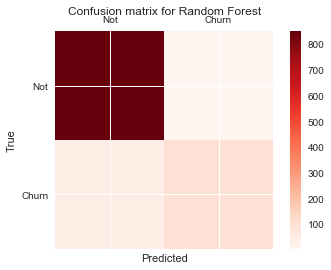

Logistic Regression
Accuracy is: 0.862
Precision is: 0.591
recall is: 0.178


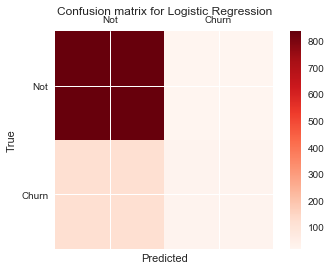

In [98]:
%matplotlib inline
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(x_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(x_test))),
]
draw_confusion_matrices(confusion_matrices)

# Model Evaluation-ROC&AUC

ROC of RF

In [101]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

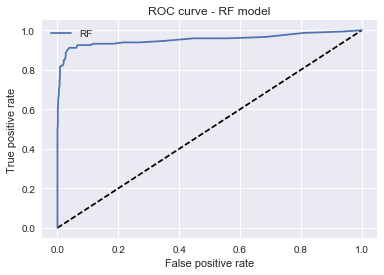

In [103]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [104]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9535425555805075

In [112]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Feature Selection

In [120]:
churn_feat=data.drop(['state','area_code','phone_number','churned'],axis=1)

In [121]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(x)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.1)
LRmodel_l1.fit(X_l1, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
number_customer_service_calls: 0.645
intl_plan: 0.6092
total_day_minutes: 0.5185
voice_mail_plan: -0.4322
total_eve_minutes: 0.2324
total_day_charge: 0.1776
total_intl_charge: 0.1618
total_intl_calls: -0.1406
total_night_charge: 0.1375
total_eve_charge: 0.0983
total_intl_minutes: 0.0544
total_night_minutes: 0.0413
account_length: 0.0391
total_day_calls: 0.0343
total_night_calls: -0.0218
total_eve_calls: -0.0056
number_vmail_messages: 0.0
